In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [17]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [18]:
X_train.shape

(60000, 28, 28)

In [19]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

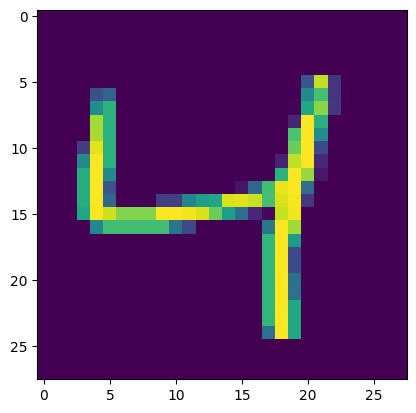

In [20]:
import matplotlib.pyplot as plt

plt.imshow(X_train[2])

In [24]:
X_train[0].max()      ###for make the range between 0 to 1

np.float64(1.0)

In [25]:
X_train = X_train/255
X_test = X_test/255

In [37]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))  ## for the make 2D to 1D
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(10, activation='softmax'))  ### for the 0-9 numbers as output

In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,946 (429.48 KB)

 Trainable params: 109,946 (429.48 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
history =model.fit(X_train,y_train,epochs=100, validation_split=0.2)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4078 - loss: 1.6535 - val_accuracy: 0.7630 - val_loss: 0.7788
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7755 - loss: 0.7498 - val_accuracy: 0.8472 - val_loss: 0.5611
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8441 - loss: 0.5497 - val_accuracy: 0.8816 - val_loss: 0.4276
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8788 - loss: 0.4240 - val_accuracy: 0.8972 - val_loss: 0.3547
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8993 - loss: 0.3509 - val_accuracy: 0.9138 - val_loss: 0.2989
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9140 - loss: 0.3001 - val_accuracy: 0.9260 - val_loss: 0.2539
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9266 - loss: 0.2576 - val_accuracy: 0.9350 - val_loss: 0.2250
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9381 - loss: 0

In [41]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [42]:
y_pred = y_prob.argmax(axis=1)

In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7418

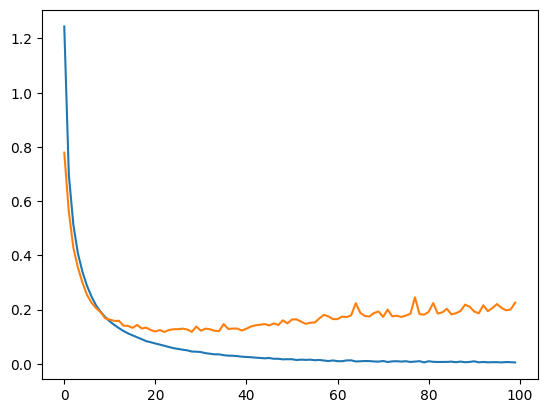

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

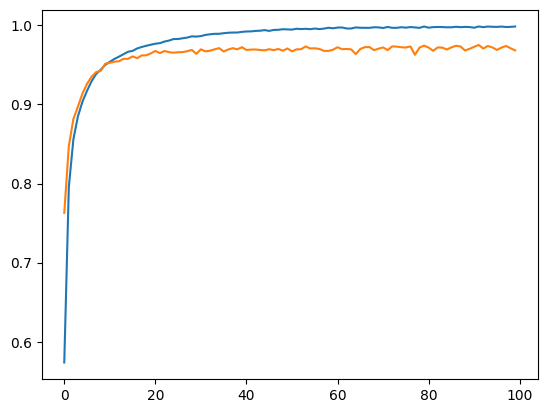

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])